In [1]:
from modules import solve_2D_schrodinger as s2ds
import numpy as np
import sys,os
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [191]:
N=80 ; V0=1e5 ; pad=0.2 ; accuracy=2
s=s2ds.setup_2d_schrodinger(N=N,pad=pad,V0=V0,accuracy=accuracy)
s.get_potential("SW")
s.get_eigen()

In [192]:
h=6.626e-34
hbar=h/2./np.pi
ech=1.60217662e-19
csol=299792458.
me=9.10938356e-31

Tilesize=20. #nm
Lsize=Tilesize-2.*pad*Tilesize
lnorm=Tilesize*1e-9/2.
Enorm=((hbar**2/ (2.*me))/ech)/(lnorm**2.)

En2d=Enorm*(s.En+s.V0)*1e3 # meV

In [193]:
zenergy=(((hbar*np.pi)**2/ (2.*me))/ech)*1e3*((arange(400.)+1.)**2./(Lsize*1e-9)**2)
zenergy=zenergy[zenergy<=max(zenergy[zenergy<s.V0])]


En3d=[]
for j, Ez in enumerate(zenergy):
    En3d=En3d + list(En2d + Ez)

En3d=np.sort(En3d)

# Thry 3D energy

In [235]:
nstate=40#int(np.ceil(len(En3d[En3d<=s.V0])**(1./3.)))
En3d_thry=[]
for i in range(nstate):
    for j in range(nstate):
        for k in range(nstate):
            En3d_thry=En3d_thry + [(i+1.)**2. + (j+1.)**2. + (k+1.)**2.]
            
En3d_thry=np.sort(En3d_thry)*(((hbar*np.pi)**2./ (2.*1.2*me))/ech)*1e3/((Lsize*1e-9)**2.)

<IPython.core.display.Javascript object>


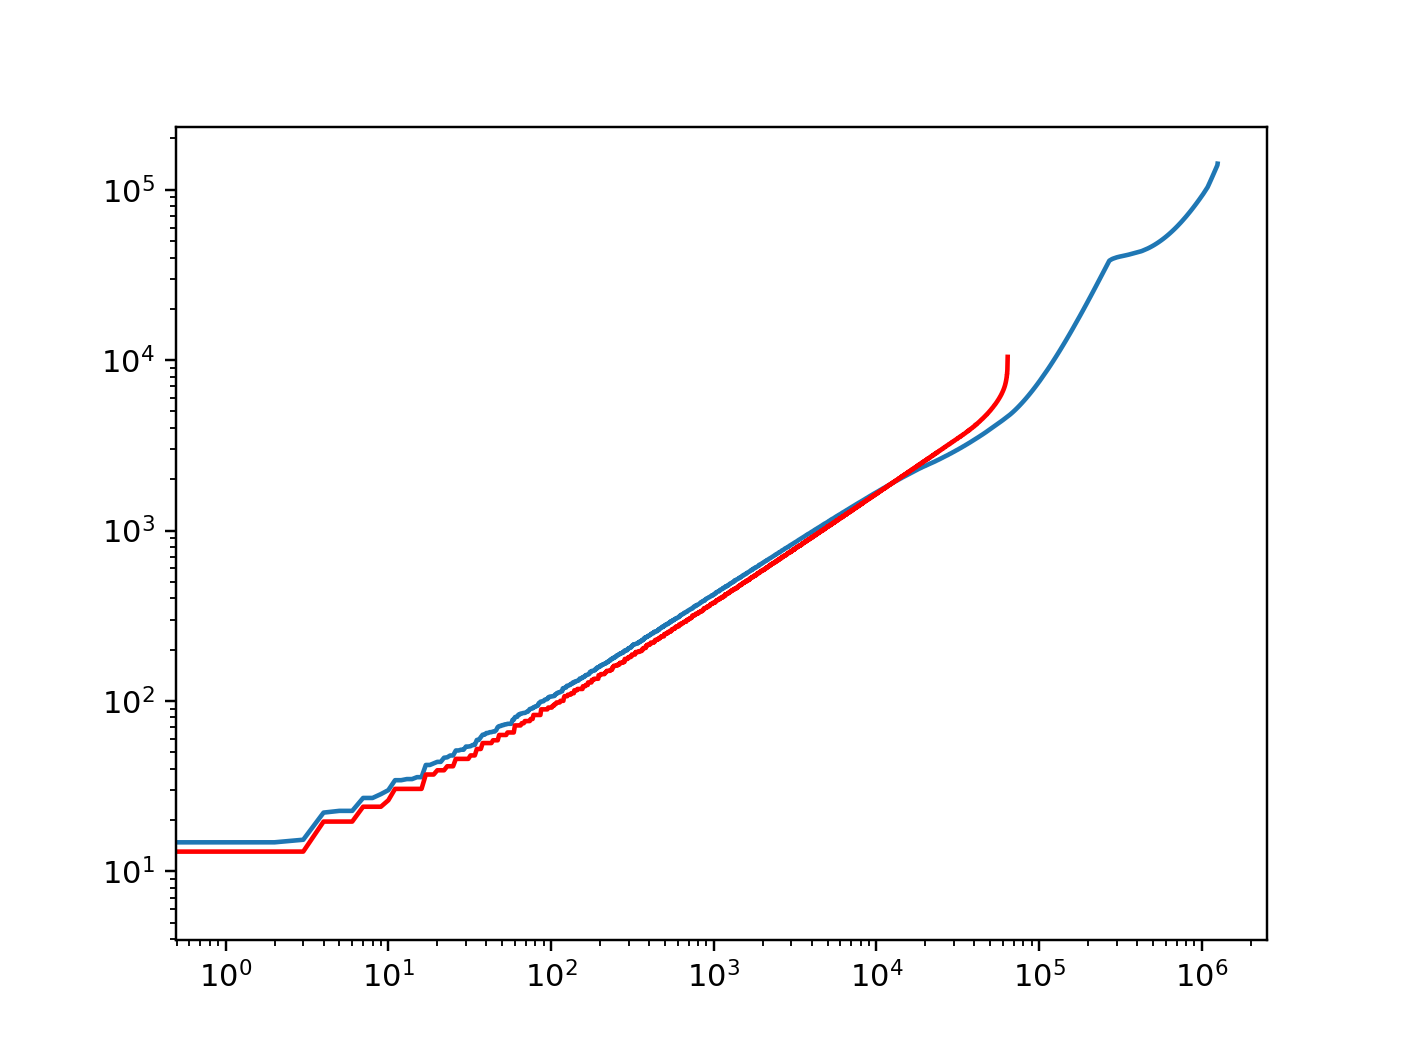

<IPython.core.display.Javascript object>


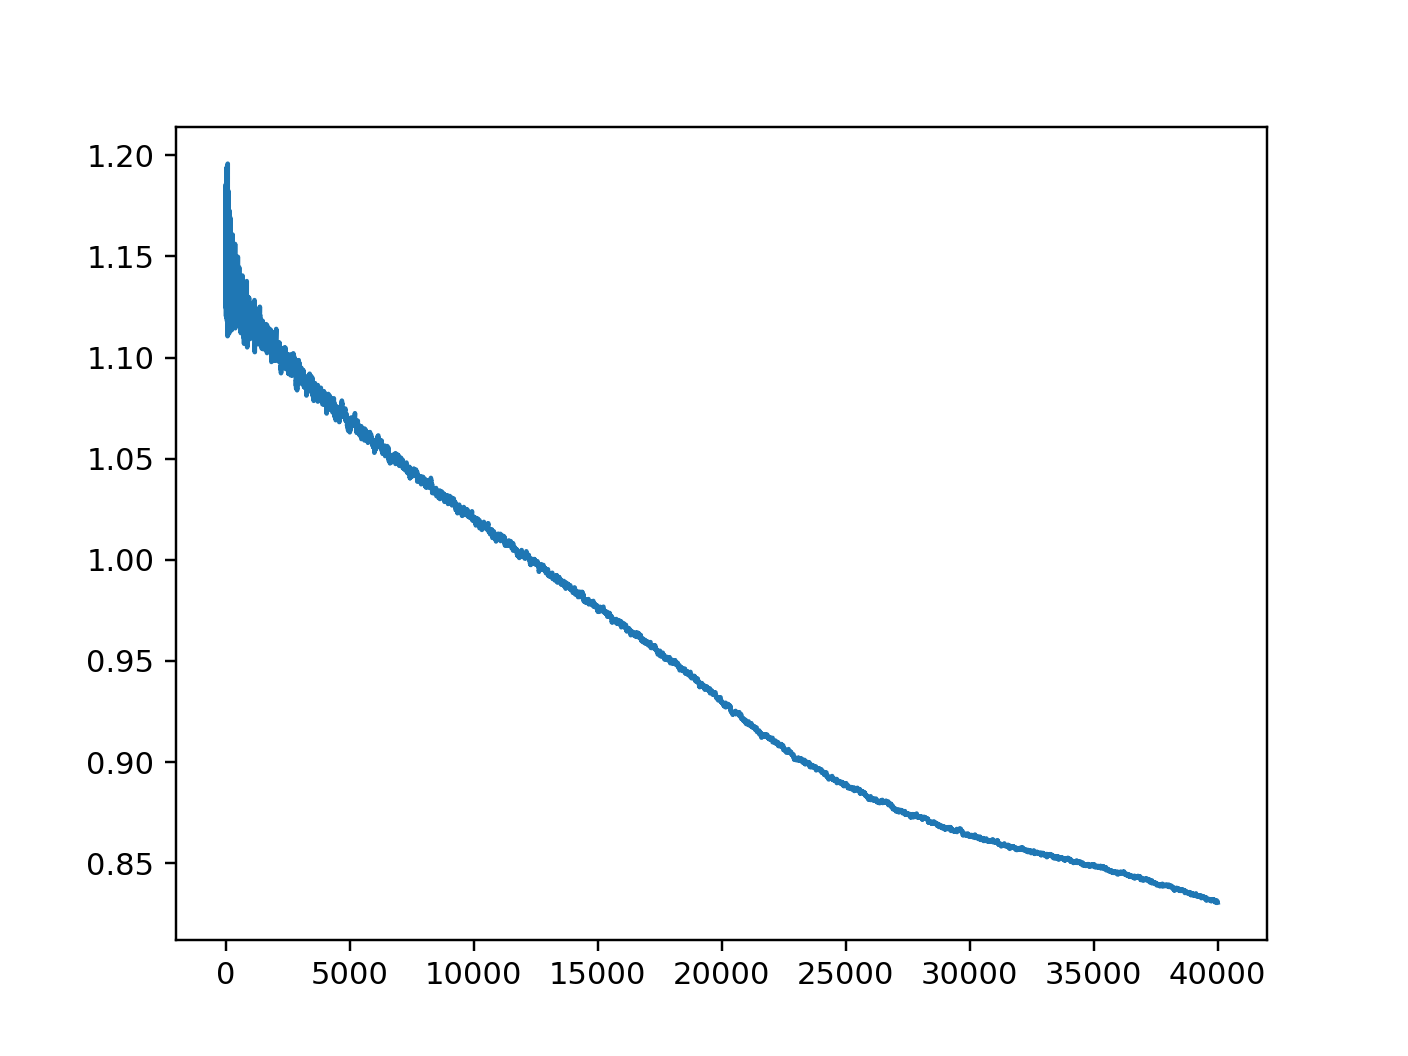

In [236]:
figure()
plot(En3d)
plot(En3d_thry,"r-")
# xlim(0,10000)
# ylim(0,1e3)
loglog()

figure()
plot(En3d[:40000]/En3d_thry[:40000])


<IPython.core.display.Javascript object>


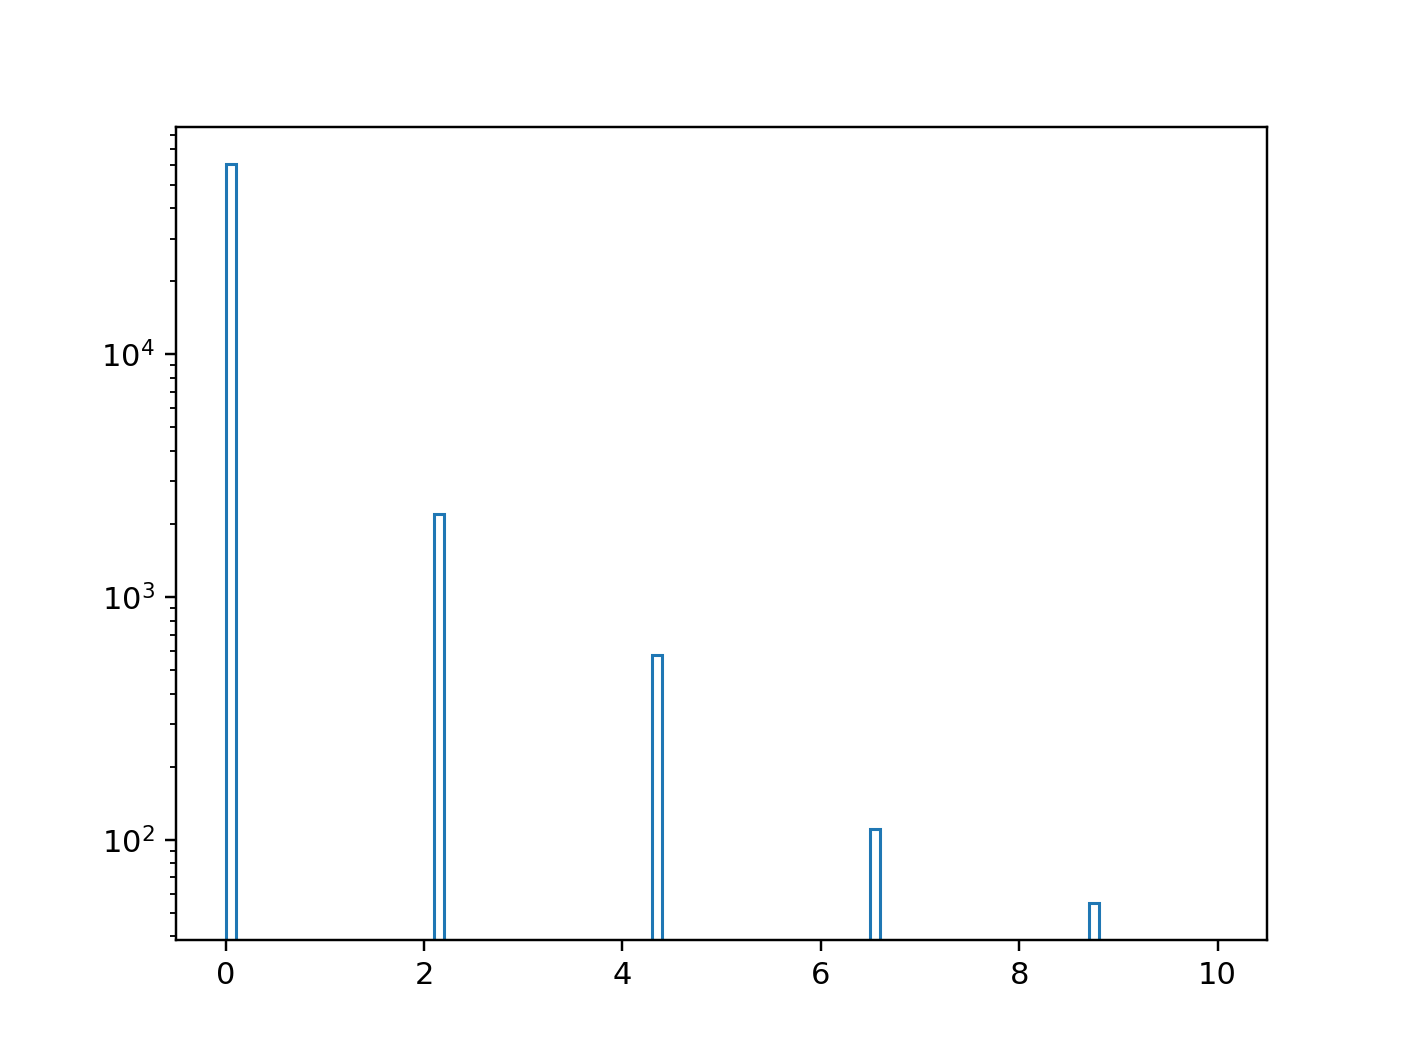

(array([6.1006e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.1940e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.7800e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

In [238]:
ydiff=En3d[1:]-En3d[:-1]
ydiff_thry=En3d_thry[1:]-En3d_thry[:-1]

figure()
# hist(ydiff,range=[0,10],bins=100,histtype="step",log=True)
hist(ydiff_thry,range=[0,10],bins=100,histtype="step",log=True)

In [239]:
ydiff_thry

array([  6.52816336,   0.        ,   0.        , ...,   0.        ,
         0.        , 171.90830191])

<IPython.core.display.Javascript object>


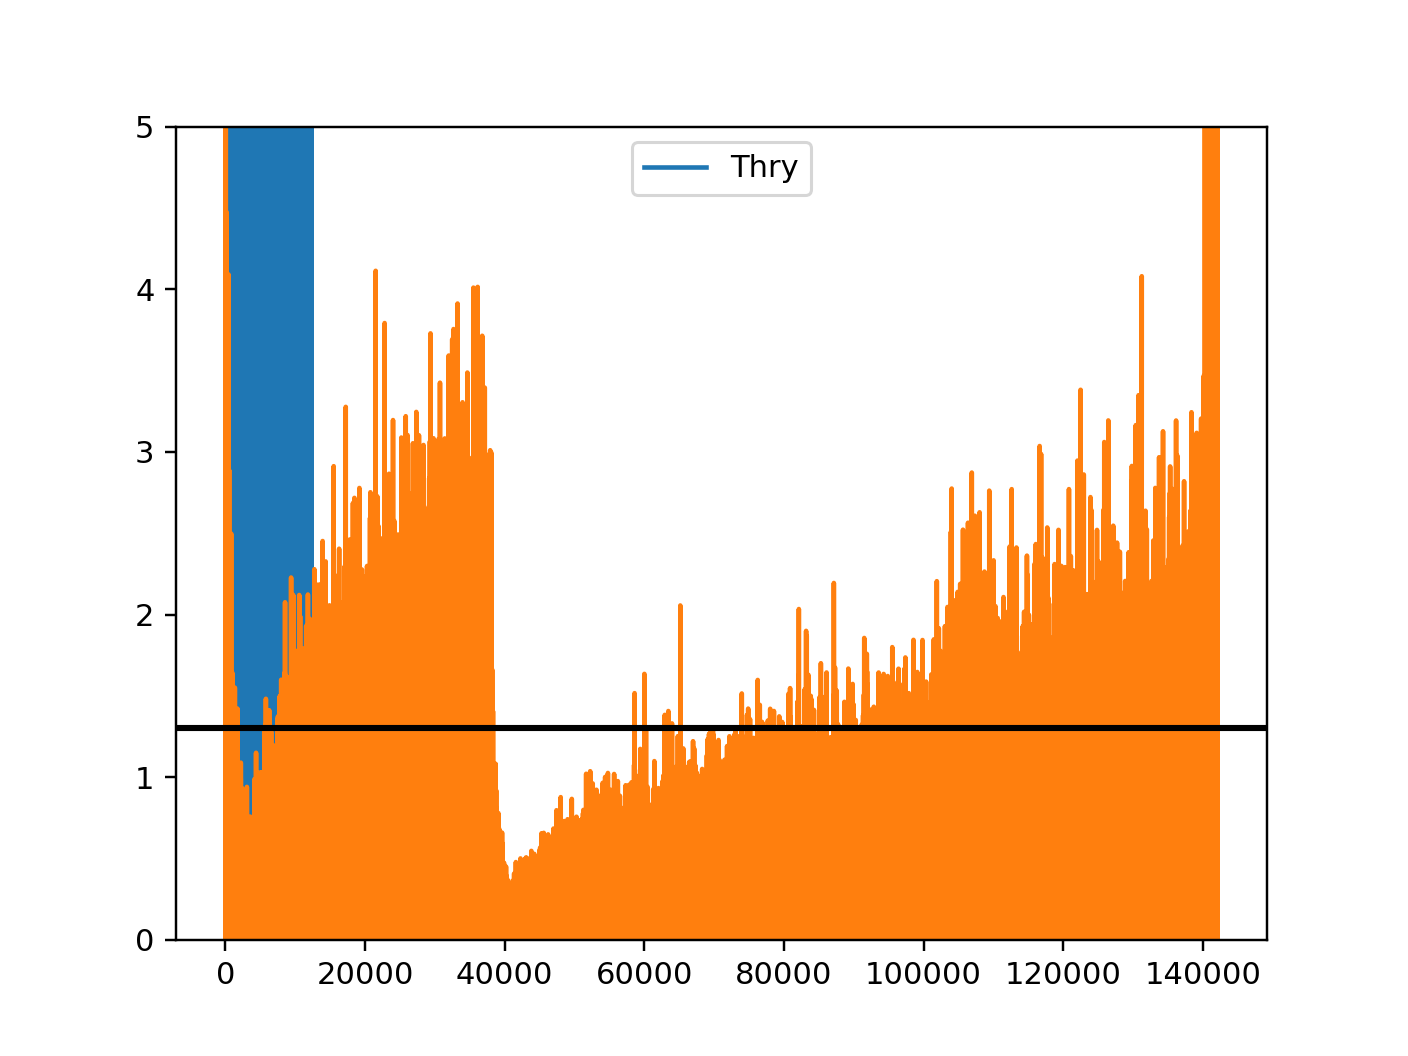

In [198]:
figure()
plot(En3d_thry[1:],ydiff_thry[:64000],label="Thry")
plot(En3d[1:],ydiff[:])
legend(loc=0)
# xlim(0,20000)
ylim(0,5)
axhline(1.3,color="k",lw=2)

<IPython.core.display.Javascript object>


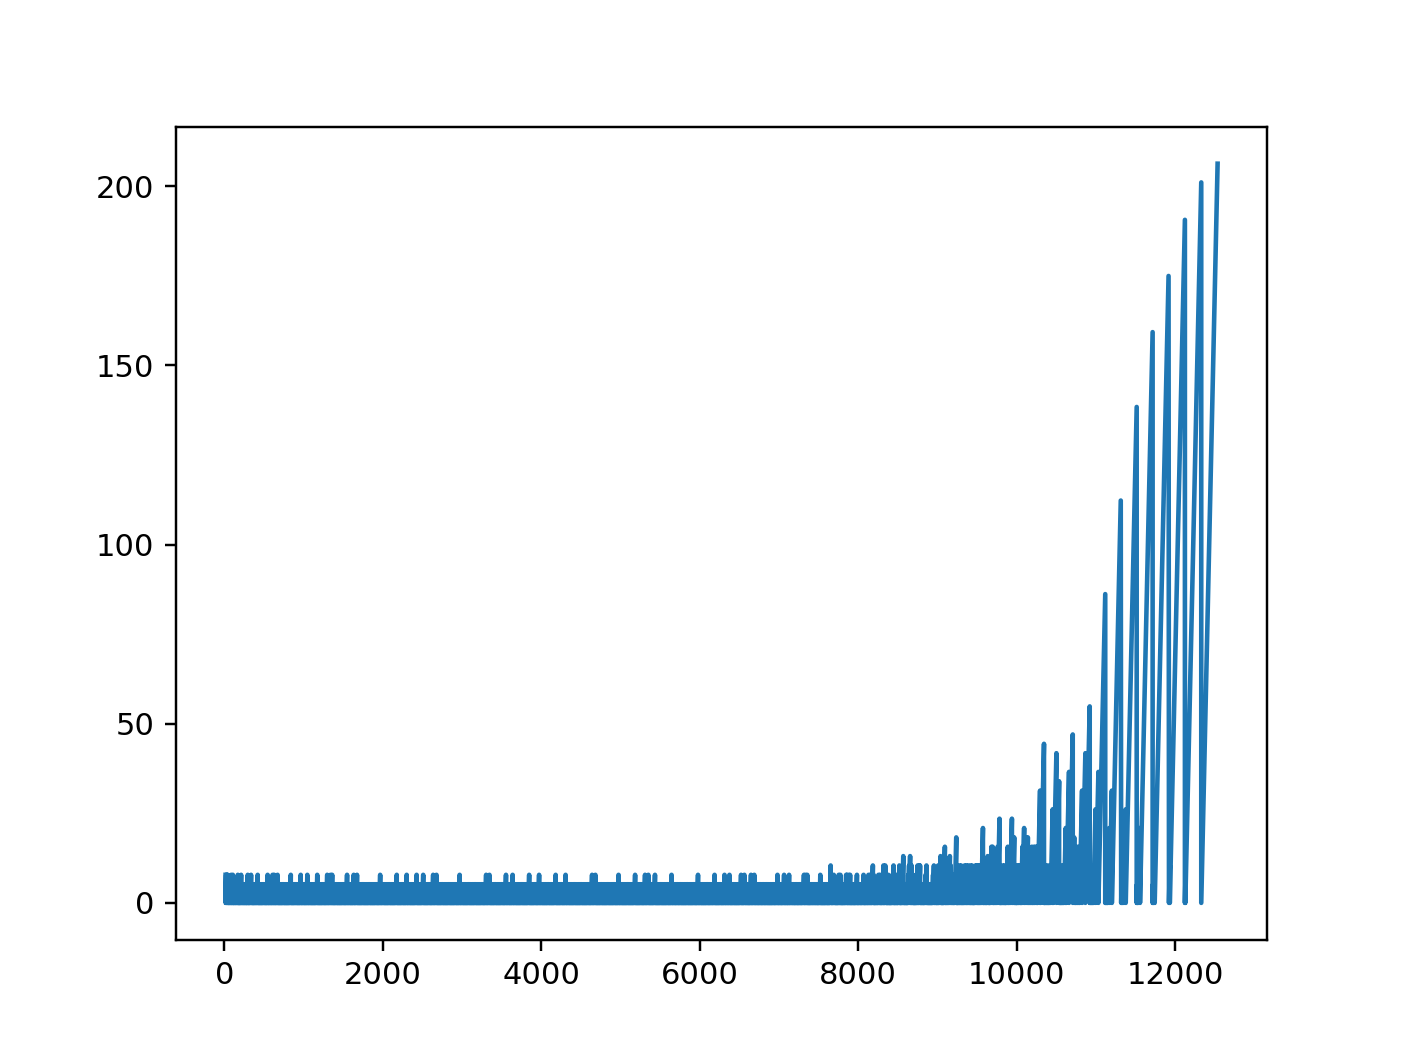

In [199]:
figure()
plot(En3d_thry[1:],ydiff_thry)

<IPython.core.display.Javascript object>


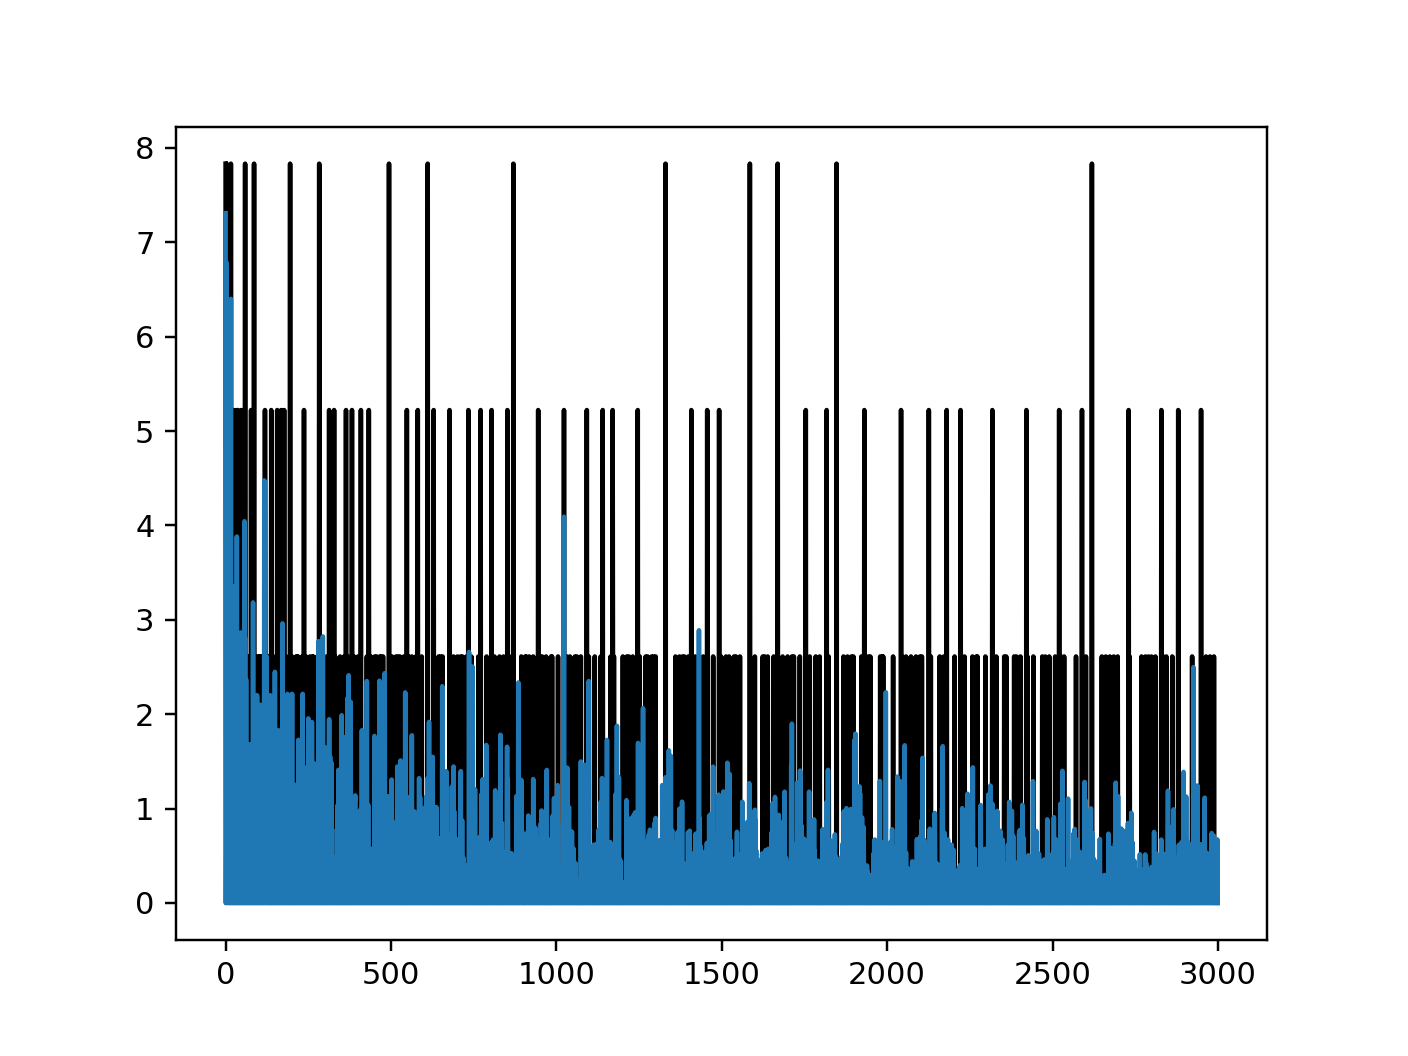

<IPython.core.display.Javascript object>


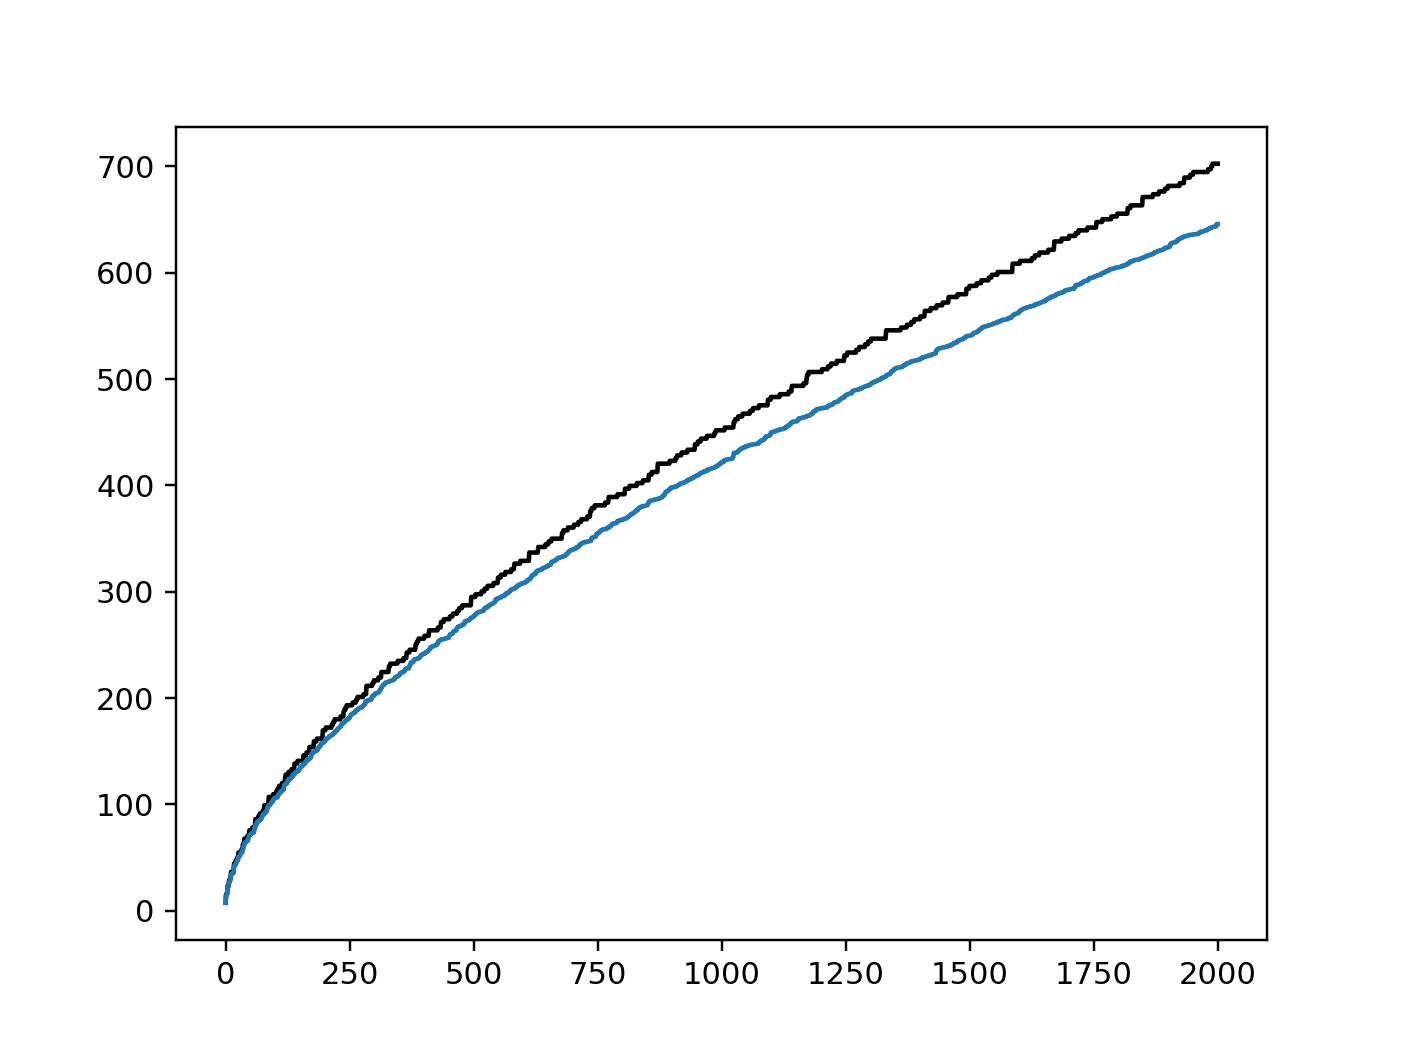

In [200]:
figure()
plot(ydiff_thry[:3000],"k-")
plot(ydiff[:3000])

figure()
plot(En3d_thry[:2000],"k-")
plot(En3d[:2000])
# loglog()

# Square well approximation

In [394]:
nstate=50#int(np.ceil(len(En3d[En3d<=s.V0])**(1./3.)))
En3d_thry=[]

Lx=12.0e-9 ; Ly=12.e-9 ; Lz=12.e-9
for i in range(nstate):
    for j in range(nstate):
        for k in range(nstate):
            En3d_thry=En3d_thry + [(i+1.)**2./Lx**2 + (j+1.)**2./Ly**2. + (k+1.)**2./Lz**2.]
            
En3d_thry_sw=np.sort(En3d_thry)*(((hbar*np.pi)**2./ (2.*1.2*me))/ech)*1e3

En3d_thry=np.copy(En3d_thry_sw)
# Natoms=5*(20/0.35)**2. 
# Natoms=(20/0.35)**3. 
Natoms=(Lx*1e9/0.35)*(Ly*1e9/(sqrt(3.)*0.35/2.))*(Lz*1e9/0.285)
Valency=2
Nstates=int(Natoms*Valency/2.)

Ef=En3d_thry[Nstates]
delta_E=2.5 # meV

idx_low=np.where(abs(En3d_thry-(Ef-delta_E))==min(abs(En3d_thry-(Ef-delta_E))))
idx_high=np.where(abs(En3d_thry-(Ef+delta_E))==min(abs(En3d_thry-(Ef+delta_E))))

dE=En3d_thry[1:]-En3d_thry[:-1]
idx_range=np.linspace(min(idx_low[0]),max(idx_high[0]),max(idx_high[0])-min(idx_low[0])+1).astype(int)
Natoms,Ef,np.mean(dE[idx_range]),len(idx_range)

(57152.09539045749, 5126.784294917786, 0.05440136136373137, 120)

# Squeezed Square well approximation

In [395]:
nstate=50#int(np.ceil(len(En3d[En3d<=s.V0])**(1./3.)))
En3d_thry=[]

Lx=12.0e-9 ; Ly=12.e-9 ; Lz=5*0.35e-9
for i in range(nstate):
    for j in range(nstate):
        for k in range(nstate):
            En3d_thry=En3d_thry + [(i+1.)**2./Lx**2 + (j+1.)**2./Ly**2. + (k+1.)**2./Lz**2.]
            
En3d_thry_ssw=np.sort(En3d_thry)*(((hbar*np.pi)**2./ (2.*1.2*me))/ech)*1e3

En3d_thry=np.copy(En3d_thry_ssw)
# Natoms=(Lx/0.35)*(Ly/(sqrt(3.)*0.35/2.))*(Lz/0.285)
Natoms=(Lx*1e9/0.35)*(Ly*1e9/(sqrt(3.)*0.35/2.))*(Lz*1e9/0.285)
Valency=2
Nstates=int(Natoms*Valency/2.)

Ef=En3d_thry[Nstates]
delta_E=2.5 # meV

idx_low=np.where(abs(En3d_thry-(Ef-delta_E))==min(abs(En3d_thry-(Ef-delta_E))))
idx_high=np.where(abs(En3d_thry-(Ef+delta_E))==min(abs(En3d_thry-(Ef+delta_E))))

dE=En3d_thry[1:]-En3d_thry[:-1]
idx_range=np.linspace(min(idx_low[0]),max(idx_high[0]),max(idx_high[0])-min(idx_low[0])+1).astype(int)
Natoms,Ef,np.mean(dE[idx_range]),len(idx_range)

(8334.68057777505, 5446.086979166937, 0.355274196661109, 15)

<IPython.core.display.Javascript object>


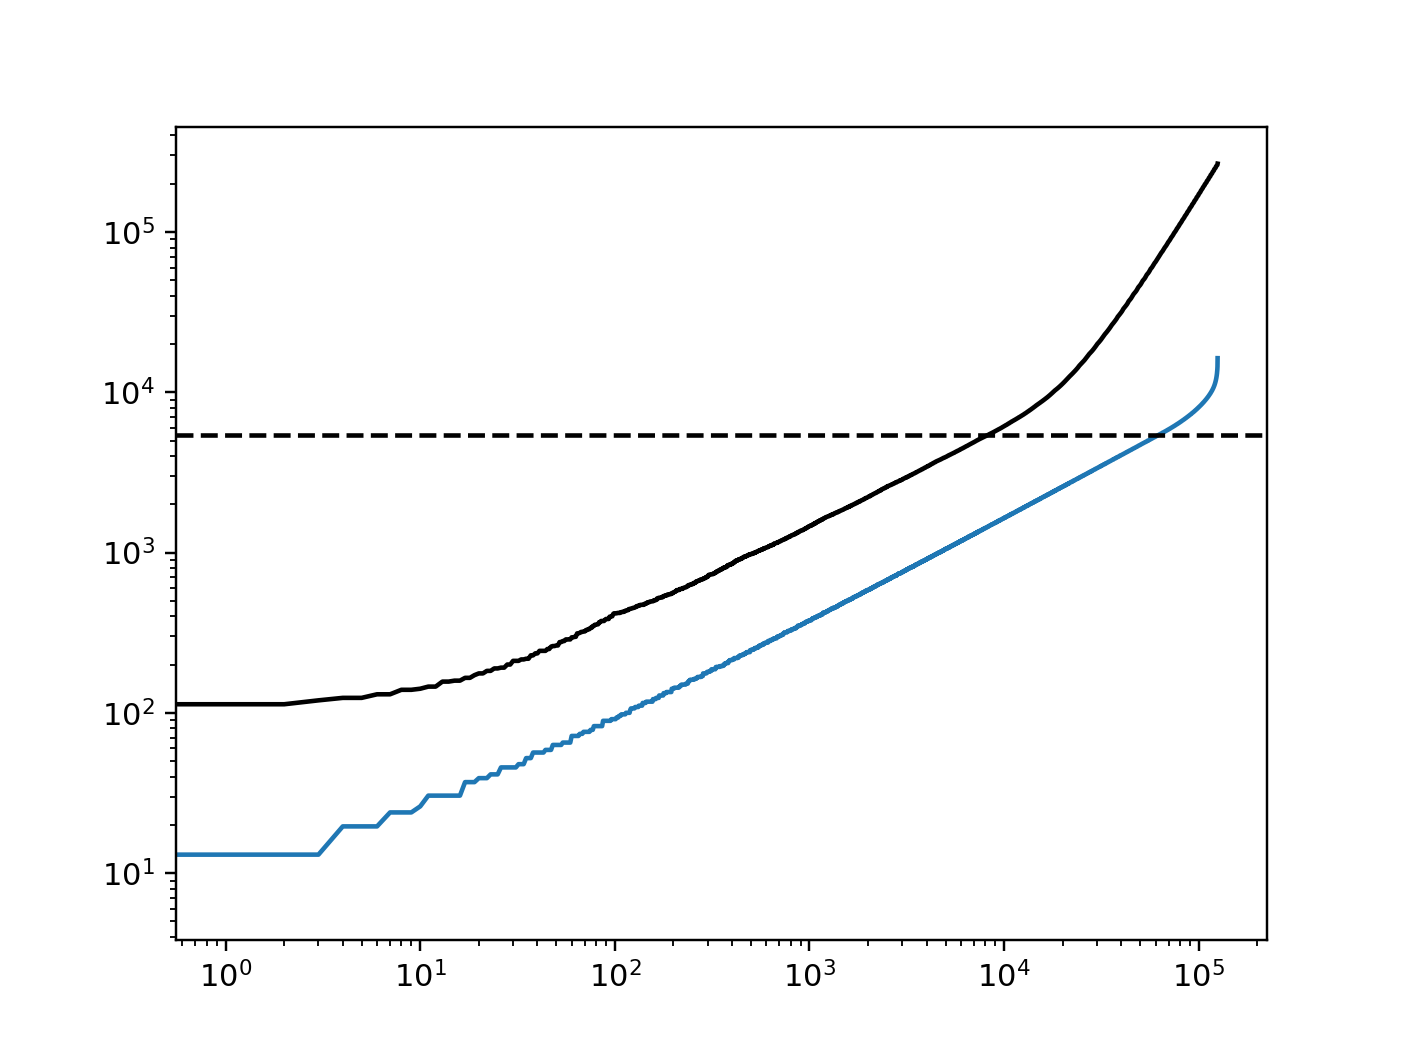

[]

In [396]:
figure()
plot(En3d_thry_sw)
plot(En3d_thry_ssw,"k-")
axhline(En3d_thry_ssw[8334],c="k",ls="--")
loglog()

In [393]:
En3d_thry_sw[57152]

6034.199002464779